In [1]:
import altair as alt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from collections import defaultdict
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import json

# Load Data

## Querying the genes of interest for metadata

In [2]:
def get_metadata(list_of_genes): 
    
    df_metadata_storage = []
    for gene_loci in list_of_genes: 
        if gene_loci in list(df_copper_genes['ncbi_locus']): 
            df_info = (df_copper_genes[(df_copper_genes['ncbi_locus'] == gene_loci)])
            df_metadata_storage.append(df_info)
            #display(df_info)

        elif gene_loci in list(df_sim_clusters['locus_id']):
            df_info = (df_sim_clusters[(df_sim_clusters['locus_id'] == gene_loci)])
            df_metadata_storage.append(df_info)
            #display(df_info)
#         else: 
#             return f"Metadata of Gene Loci {gene_loci} Not Accessible Here"
        
    df_metadata_storage = pd.concat(df_metadata_storage)
    display(df_metadata_storage)
    return df_metadata_storage

## Copper Genes

In [6]:
# load cluster data
copper_genes_file = '/work/skvdev17/workspace/5G-rnaseq-sandbox/data/regulatory_response_genes.csv'

# load copper TPM data
df_copper_genes = pd.read_csv(copper_genes_file).fillna('')
df_copper_genes.columns = df_copper_genes.iloc[0]
df_copper_genes.drop(axis = 0, index = 0)

,,mage_locus,mage_gene,ncbi_locus,ncbi_gene,ncbi_product,regulation,notes
1,,MBURv2_210004,,EQU24_RS19505,,hypothetical protein,repressible,Cluster 8 and 18 genes from Alexey's thesis
2,,MBURv2_210005,,EQU24_RS19500,,hypothetical protein,repressible,Cluster 8 and 18 genes from Alexey's thesis
3,,MBURv2_210008,,EQU24_RS19485,,hypothetical protein,repressible,Cluster 8 and 18 genes from Alexey's thesis
4,,MBURv2_210010,,EQU24_RS19475,,hypothetical protein,repressible,Cluster 8 and 18 genes from Alexey's thesis
5,,MBURv2_210011,,EQU24_RS19470,,S8 family serine peptidase,repressible,Cluster 8 and 18 genes from Alexey's thesis
6,,MBURv2_210012,,EQU24_RS19465,,type II secretion system protein,repressible,Cluster 8 and 18 genes from Alexey's thesis
7,,MBURv2_210013,,EQU24_RS19460,,hypothetical protein,repressible,Cluster 8 and 18 genes from Alexey's thesis
8,,MBURv2_210014,,EQU24_RS19455,,MoxR family ATPase,repressible,Cluster 8 and 18 genes from Alexey's thesis
9,,MBURv2_210015,,EQU24_RS19450,,DUF58 domain-containing protein,repressible,Cluster 8 and 18 genes from Alexey's thesis
10,,MBURv2_210016,,EQU24_RS19445,,DUF3488 domain-containing protein,repressible,Cluster 8 and 18 genes from Alexey's thesis


In [7]:
copper_genes = df_copper_genes["ncbi_locus"]
copper_genes

0        ncbi_locus
1     EQU24_RS19505
2     EQU24_RS19500
3     EQU24_RS19485
4     EQU24_RS19475
5     EQU24_RS19470
6     EQU24_RS19465
7     EQU24_RS19460
8     EQU24_RS19455
9     EQU24_RS19450
10    EQU24_RS19445
11    EQU24_RS19520
12    EQU24_RS19495
13    EQU24_RS15800
14    EQU24_RS01900
15    EQU24_RS21005
16    EQU24_RS02325
17    EQU24_RS00675
18    EQU24_RS02555
19        not found
20    EQU24_RS01840
21    EQU24_RS01835
22    EQU24_RS19170
23    EQU24_RS05885
24    EQU24_RS19520
25    EQU24_RS21000
26    EQU24_RS21005
27    EQU24_RS00670
28    EQU24_RS05870
29    EQU24_RS10665
30        not found
31    EQU24_RS05870
32    EQU24_RS05865
33    EQU24_RS15800
34    EQU24_RS19515
35    EQU24_RS04725
36    EQU24_RS19510
37    EQU24_RS16960
38    EQU24_RS05900
39        not found
40    EQU24_RS05880
41    EQU24_RS05895
42    EQU24_RS05890
43    EQU24_RS05910
44    EQU24_RS05905
45    EQU24_RS05915
46    EQU24_RS05920
47    EQU24_RS05925
48    EQU24_RS19315
49    EQU24_RS19310


## Average Log Ratio Scaled TPM Data

In [10]:
# load average log ratio TPM data

avg_log_ratio_scaled_file = '/work/skvdev17/workspace/5G-rnaseq-sandbox/data/avg_log_ratio_scaled.csv'


# load TPM data
df_avg_log_ratio_scaled = pd.read_csv(avg_log_ratio_scaled_file).fillna('')
df_avg_log_ratio_scaled

,locus_tag,LanzaTech,MeOH,NO3_lowO2_slow_growth,NoCu,NoLanthanum,WT_control,WithLanthanum,aa3_KO,crotonic_acid,...,highO2_slow_growth,lowCH4,lowCu,lowO2_fast_growth,lowO2_low_iron_fast_growth,lowO2_slow_growth,medCu,slow_growth,uMax,unknown
0,EQU24_RS00005,-0.515808,-0.012058,-0.480048,-0.163349,-0.648447,-0.037469,-0.491013,-0.410117,-0.485123,...,0.060397,-0.186470,-0.136377,-0.203679,-0.487435,-0.243069,0.044174,-0.122244,0.185208,-0.620522
1,EQU24_RS00010,0.480568,-0.659004,-0.218643,0.075821,-0.485571,-0.114821,-0.462526,0.094641,-0.209870,...,0.504025,-0.305931,0.204399,-0.103679,-0.283817,0.062219,0.461263,0.103303,0.191813,-0.798028
2,EQU24_RS00015,-1.072637,0.327816,-0.461533,-0.212764,-0.583017,-0.648530,-0.633792,-0.917224,-0.048206,...,0.138747,-0.385615,-0.106453,0.142845,-0.057250,-0.235794,0.034638,-0.609406,0.158782,-0.753895
3,EQU24_RS00020,0.723618,-1.032390,0.072132,-0.253222,-0.352283,0.183488,-0.292974,0.144541,0.167185,...,-0.108216,-0.132304,-0.051795,-0.311922,0.060748,-0.078771,0.169326,0.274118,0.198566,-0.532597
4,EQU24_RS00025,0.424262,-0.479325,0.028098,0.116538,-0.261659,0.082847,-0.454102,-0.051229,0.045575,...,0.450111,0.011533,0.240761,-0.573878,0.722346,0.029248,0.311967,0.268652,0.181731,-0.011128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,-0.445389,-0.627550,-1.170665,-0.396450,-1.877416,-0.819438,-1.715711,-0.966683,-0.144739,...,-1.123350,0.097626,-0.295041,0.153868,0.071796,-0.825055,0.213758,-1.168263,0.206290,-0.784262
4209,EQU24_RS22140,0.309593,-1.327737,-1.065740,-0.706776,-1.812366,-0.818297,-1.749368,-0.654022,-0.239402,...,-1.305006,-0.407547,-0.418638,0.243782,-0.820586,-0.906017,-0.091223,-0.946392,0.229381,-1.159766
4210,EQU24_RS22145,-1.028264,-0.395724,-1.265702,-0.657315,-2.492508,-0.803695,-2.140667,-0.926349,-0.555916,...,-1.210127,0.079368,-0.380479,0.362696,-0.218650,-0.747930,0.020182,-0.861652,0.229635,-1.151259
4211,EQU24_RS22150,-0.670633,-0.279756,-1.404703,-0.775605,-2.384838,-1.209018,-2.238072,-1.143556,-1.210963,...,-1.730685,0.119592,-0.495403,0.627209,-0.443132,-1.002031,-0.030594,-0.961987,0.233474,-1.159678


In [11]:
labels_ordered = df_avg_log_ratio_scaled.loc[:, "locus_tag"]
labels_ordered

0       EQU24_RS00005
1       EQU24_RS00010
2       EQU24_RS00015
3       EQU24_RS00020
4       EQU24_RS00025
            ...      
4208    EQU24_RS22135
4209    EQU24_RS22140
4210    EQU24_RS22145
4211    EQU24_RS22150
4212    EQU24_RS22155
Name: locus_tag, Length: 4213, dtype: object

In [13]:
ideal_labels_file = "/work/skvdev17/workspace/5G-rnaseq-sandbox/data/ideal_labels"

# load copper TPM data
df_ideal_labels = pd.read_pickle(ideal_labels_file)
df_ideal_labels

,method,labels,param1,param2,param3
0,agglomerative,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",single,19.0,NaN
1,agglomerative,"[7, 7, 7, 7, 7, 1, 7, 1, 1, 1, 1, 8, 7, 8, 7, ...",complete,19.0,NaN
2,agglomerative,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",single,12.0,NaN
3,agglomerative,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",average,21.0,NaN
4,kmeans,"[12, 4, 17, 4, 4, 1, 12, 7, 7, 7, 7, 12, 17, 9...",19,NaN,NaN
5,kmeans,"[18, 18, 17, 18, 18, 0, 5, 0, 0, 0, 0, 5, 3, 1...",20,NaN,NaN
6,birch,"[0, 6, 0, 6, 6, 14, 6, 14, 14, 14, 14, 6, 12, ...",0.48,54.0,16.0
7,birch,"[14, 14, 3, 14, 21, 5, 5, 21, 21, 21, 21, 5, 7...",0.48,50.0,31.0
8,kmedoids,"[25, 9, 20, 26, 9, 19, 18, 19, 19, 21, 21, 22,...",36,NaN,NaN
9,dbscan,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.5,4.0,NaN


## Other Similar Genes

In [15]:
similar_clusters_file = '/work/skvdev17/workspace/5G-rnaseq-sandbox/data/sim_cluster.txt'

df_sim_clusters = pd.read_csv(similar_clusters_file, sep = '\t').fillna('')
df_sim_clusters

,group,locus_id,gene,product,notes,Unnamed: 5
0,nif,EQU24_RS17345,nifV,homocitrate synthase,,
1,nif,EQU24_RS17340,cysE(nifP?),serine O-acetyltransferase,,
2,nif,EQU24_RS17335,,hypothetical protein,,
3,nif,EQU24_RS17330,,(2Fe-2S) ferredoxin domain-containing protein,,
4,nif,EQU24_RS17325,,hypothetical protein,,
...,...,...,...,...,...,...
91,cu_repressible,EQU24_RS10665,,chemotaxis protein,Cu Expression analysis doc from Joseph,
92,cu_repressible,EQU24_RS19515,,hypothetical protein,Cu Expression analysis doc from Joseph,
93,cu_repressible,EQU24_RS19510,,DUF2939 domain-containing protein,Cu Expression analysis doc from Joseph,
94,cu_repressible,EQU24_RS05915,,BLUF domain-containing protein,Cu Expression analysis doc from Joseph,


In [16]:
sim_cluster_loci = pd.Series(df_sim_clusters.groupby("group")["locus_id"].apply(list).to_dict())
sim_cluster_loci

cu_repressible    [EQU24_RS19505, EQU24_RS19500, EQU24_RS19485, ...
mxa               [EQU24_RS18155, EQU24_RS18145, EQU24_RS18140, ...
nif               [EQU24_RS17345, EQU24_RS17340, EQU24_RS17335, ...
smo               [EQU24_RS05930, EQU24_RS05925, EQU24_RS05910, ...
dtype: object

In [17]:
def build_similar_loci(cluster_composition, type_similar): 
    buckets_similar = []
    counts_buckets_similar = []
    total_similar_count = len(list(set(sim_cluster_loci[type_similar])))

    for num, cluster in enumerate(cluster_composition): 
        buckets_similar.append([num, cluster, list(set(sim_cluster_loci[type_similar]) & set(cluster))])
        
        overlap_count = len(list(set(sim_cluster_loci[type_similar]) & set(cluster)))
        
        counts_buckets_similar.append([num, len(cluster), overlap_count, (overlap_count/total_similar_count)])

    df_buckets_similar = pd.DataFrame(buckets_similar)
    df_buckets_similar.columns = ["cluster_num", "all_loci", "similar_loci"]

    df_counts_buckets_similar = pd.DataFrame(counts_buckets_similar)
    df_counts_buckets_similar.columns = ["cluster_num", "all_loci", "similar_loci", "ratio_of_similar"]

    return [df_buckets_similar, df_counts_buckets_similar]

In [18]:
for num, list_labels in enumerate(df_ideal_labels.labels): 
    
    method = df_ideal_labels.iloc[num]["method"]
    param1 = df_ideal_labels.iloc[num]["param1"]
    param2 = df_ideal_labels.iloc[num]["param2"]
    param3 = df_ideal_labels.iloc[num]["param3"]
    
    title_method = str(method) + ", param1 = " + str(param1) + ", param2 = " +str(param2)  + ", param3 = " + str(param3) 
    
    
    method_label = pd.Series(df_ideal_labels.labels[num], index = labels_ordered)
    df_method_label = pd.DataFrame(method_label)
    df_method_label.columns = ['cluster_num']
    df_method_label = df_method_label.sort_values('cluster_num')
    df_method_label = df_method_label.reset_index()
    
    method_cluster_composition = pd.Series(df_method_label.groupby("cluster_num")["locus_tag"].apply(list).to_dict())
    
    for sim_gene in sim_cluster_loci.keys():

        all_sim_genes = build_similar_loci(method_cluster_composition, sim_gene)

        df_counts_all_sim_genes = all_sim_genes[1]
        df_list_all_sim_genes = all_sim_genes[0]

        title = "Cluster ratios of " + sim_gene + " genes with method: " + title_method
        yaxis = 'ratio of ' + sim_gene + " genes"

        g = alt.Chart(df_counts_all_sim_genes).mark_bar().encode(
            x=alt.X('cluster_num:N'),
            y=alt.Y('ratio_of_similar:Q', title= yaxis), #, scale = alt.Scale(type = "symlog")),
            tooltip=['all_loci:Q', 'similar_loci:Q']
            ).configure_view(
            stroke='transparent'
            ).interactive()

        g.title = title

        g.display()
        
        specific_folder = str(sim_gene) + "/"
        save_location = 'plots/other_similar_gene_verification/'+ specific_folder + title.replace(" ", "_") + ".html"
        g.save(save_location, embed_options={'renderer':'svg'})

alt.Chart(...)

FileNotFoundError: [Errno 2] No such file or directory: 'plots/other_similar_gene_verification/cu_repressible/Cluster_ratios_of_cu_repressible_genes_with_method:_agglomerative,_param1_=_single,_param2_=_19.0,_param3_=_nan.html'

In [19]:
granular_all_genes = df_copper_genes[["ncbi_locus", "regulation"]].drop(axis = 1, index=0).groupby("regulation")["ncbi_locus"].apply(list).to_dict()
granular_all_genes.pop('')
granular_all_genes.update(sim_cluster_loci)
granular_all_genes

{'inducible': ['EQU24_RS02555',
  'EQU24_RS19170',
  'EQU24_RS19315',
  'EQU24_RS19310',
  'EQU24_RS19305'],
 'repressible': ['EQU24_RS19505',
  'EQU24_RS19500',
  'EQU24_RS19485',
  'EQU24_RS19475',
  'EQU24_RS19470',
  'EQU24_RS19465',
  'EQU24_RS19460',
  'EQU24_RS19455',
  'EQU24_RS19450',
  'EQU24_RS19445',
  'EQU24_RS19520',
  'EQU24_RS19495',
  'EQU24_RS15800',
  'EQU24_RS01900',
  'EQU24_RS21005',
  'EQU24_RS02325',
  'EQU24_RS00675',
  'EQU24_RS05885',
  'EQU24_RS19520',
  'EQU24_RS21000',
  'EQU24_RS21005',
  'EQU24_RS00670',
  'EQU24_RS05870',
  'EQU24_RS10665',
  'EQU24_RS05870',
  'EQU24_RS15800',
  'EQU24_RS19515',
  'EQU24_RS19510',
  'EQU24_RS05900',
  'EQU24_RS05880',
  'EQU24_RS05895',
  'EQU24_RS05890',
  'EQU24_RS05910',
  'EQU24_RS05905',
  'EQU24_RS05915',
  'EQU24_RS05920',
  'EQU24_RS05925',
  'EQU24_RS19480',
  'EQU24_RS19490',
  'EQU24_RS10650'],
 'unclear': ['EQU24_RS01840',
  'EQU24_RS01835',
  'EQU24_RS05865',
  'EQU24_RS04725',
  'EQU24_RS16960'],
 'cu_rep

# Sample with kMedoids

In [20]:

method_to_labels = pd.Series(df_ideal_labels.labels.values, index = df_ideal_labels.method).to_dict

method_to_labels

<bound method Series.to_dict of method
agglomerative    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
agglomerative    [7, 7, 7, 7, 7, 1, 7, 1, 1, 1, 1, 8, 7, 8, 7, ...
agglomerative    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
agglomerative    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
kmeans           [12, 4, 17, 4, 4, 1, 12, 7, 7, 7, 7, 12, 17, 9...
kmeans           [18, 18, 17, 18, 18, 0, 5, 0, 0, 0, 0, 5, 3, 1...
birch            [0, 6, 0, 6, 6, 14, 6, 14, 14, 14, 14, 6, 12, ...
birch            [14, 14, 3, 14, 21, 5, 5, 21, 21, 21, 21, 5, 7...
kmedoids         [25, 9, 20, 26, 9, 19, 18, 19, 19, 21, 21, 22,...
dbscan           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
dtype: object>

In [21]:
kmedoids_label = pd.Series(df_ideal_labels.labels[7], index = labels_ordered)



In [22]:

kmedoids_label



locus_tag
EQU24_RS00005    14
EQU24_RS00010    14
EQU24_RS00015     3
EQU24_RS00020    14
EQU24_RS00025    21
                 ..
EQU24_RS22135     9
EQU24_RS22140     9
EQU24_RS22145     9
EQU24_RS22150     9
EQU24_RS22155     9
Length: 4213, dtype: int64

In [23]:
df_kmedoids_labels = pd.DataFrame(kmedoids_label)
df_kmedoids_labels.columns = ['cluster_num']
df_kmedoids_labels = df_kmedoids_labels.sort_values('cluster_num')
df_kmedoids_labels = df_kmedoids_labels.reset_index()

df_kmedoids_labels

,locus_tag,cluster_num
0,EQU24_RS19505,0
1,EQU24_RS21000,0
2,EQU24_RS01900,0
3,EQU24_RS07680,0
4,EQU24_RS07675,0
...,...,...
4208,EQU24_RS12815,30
4209,EQU24_RS05090,30
4210,EQU24_RS18430,30
4211,EQU24_RS03435,30


In [24]:
kmedoids_cluster_composition = pd.Series(df_kmedoids_labels.groupby("cluster_num")["locus_tag"].apply(list).to_dict())

In [25]:
kmedoids_cluster_composition

0     [EQU24_RS19505, EQU24_RS21000, EQU24_RS01900, ...
1     [EQU24_RS17085, EQU24_RS17070, EQU24_RS17075, ...
2     [EQU24_RS17360, EQU24_RS20900, EQU24_RS11910, ...
3     [EQU24_RS13855, EQU24_RS15320, EQU24_RS12890, ...
4     [EQU24_RS04610, EQU24_RS21775, EQU24_RS13375, ...
5     [EQU24_RS06430, EQU24_RS16940, EQU24_RS06260, ...
6     [EQU24_RS02980, EQU24_RS14670, EQU24_RS10950, ...
7     [EQU24_RS08190, EQU24_RS08195, EQU24_RS08120, ...
8     [EQU24_RS12065, EQU24_RS21910, EQU24_RS21900, ...
9     [EQU24_RS13320, EQU24_RS13325, EQU24_RS12245, ...
10    [EQU24_RS21180, EQU24_RS21945, EQU24_RS19805, ...
11    [EQU24_RS17185, EQU24_RS00630, EQU24_RS00645, ...
12    [EQU24_RS21950, EQU24_RS21955, EQU24_RS00680, ...
13    [EQU24_RS06695, EQU24_RS16035, EQU24_RS16415, ...
14    [EQU24_RS05160, EQU24_RS18070, EQU24_RS05185, ...
15    [EQU24_RS07175, EQU24_RS07165, EQU24_RS16230, ...
16    [EQU24_RS07670, EQU24_RS05870, EQU24_RS17510, ...
17    [EQU24_RS20580, EQU24_RS20570, EQU24_RS205

In [42]:
type_of_gene = "smo"
cluster = kmedoids_cluster_composition[30]
print(kmedoids_cluster_composition)
print(set(granular_all_genes["smo"]) & set(cluster))
buckets_all[type_of_gene].append(list(set(granular_all_genes.values()) & set(cluster)))
buckets_all

0     [EQU24_RS19505, EQU24_RS21000, EQU24_RS01900, ...
1     [EQU24_RS17085, EQU24_RS17070, EQU24_RS17075, ...
2     [EQU24_RS17360, EQU24_RS20900, EQU24_RS11910, ...
3     [EQU24_RS13855, EQU24_RS15320, EQU24_RS12890, ...
4     [EQU24_RS04610, EQU24_RS21775, EQU24_RS13375, ...
5     [EQU24_RS06430, EQU24_RS16940, EQU24_RS06260, ...
6     [EQU24_RS02980, EQU24_RS14670, EQU24_RS10950, ...
7     [EQU24_RS08190, EQU24_RS08195, EQU24_RS08120, ...
8     [EQU24_RS12065, EQU24_RS21910, EQU24_RS21900, ...
9     [EQU24_RS13320, EQU24_RS13325, EQU24_RS12245, ...
10    [EQU24_RS21180, EQU24_RS21945, EQU24_RS19805, ...
11    [EQU24_RS17185, EQU24_RS00630, EQU24_RS00645, ...
12    [EQU24_RS21950, EQU24_RS21955, EQU24_RS00680, ...
13    [EQU24_RS06695, EQU24_RS16035, EQU24_RS16415, ...
14    [EQU24_RS05160, EQU24_RS18070, EQU24_RS05185, ...
15    [EQU24_RS07175, EQU24_RS07165, EQU24_RS16230, ...
16    [EQU24_RS07670, EQU24_RS05870, EQU24_RS17510, ...
17    [EQU24_RS20580, EQU24_RS20570, EQU24_RS205

TypeError: unhashable type: 'list'

In [43]:

buckets_all = {"inducible": [], "repressible": [], "unclear": [], "cu_repressible": [], "mxa": [], "nif": [], "smo": []}
counts_buckets_all = {"inducible": [], "repressible": [], "unclear": [], "cu_repressible": [], "mxa": [], "nif": [], "smo": []}
types = (list(granular_all_genes.keys()))

bucket_all_labeled = []
bucket_all_else = kmedoids_cluster_composition.copy()
counts_bucket_all_else = kmedoids_cluster_composition.copy()
 
for type_of_gene in types:
    for num, cluster in enumerate(kmedoids_cluster_composition): 
        buckets_all[type_of_gene].append(list(set(granular_all_genes[type_of_gene]) & set(cluster)))
        counts_buckets_all[type_of_gene].append(len(list(set(granular_all_genes[type_of_gene]) & set(cluster))))

for num, cluster in enumerate(kmedoids_cluster_composition): 
    for type_of_gene in types:
        if type_of_gene == types[0]:
            merged_loci = set(buckets_all[type_of_gene][num])
            bucket_all_labeled.append((merged_loci))
        else: 
            merged_loci = set(buckets_all[type_of_gene][num]) | set(bucket_all_labeled[num])
            bucket_all_labeled[num] = ((merged_loci))
            
for num, cluster in enumerate(kmedoids_cluster_composition): 
    bucket_all_else[num] = set(bucket_all_else[num]) - set(bucket_all_labeled[num])
    counts_bucket_all_else[num] = len(bucket_all_else[num])

df_all_clusters = pd.DataFrame(buckets_all)
df_count_all_clusters = pd.DataFrame(counts_buckets_all)

df_formatted_clusters = pd.DataFrame(np.arange(0, len(bucket_all_else)))
df_formatted_clusters["all_loci"] = kmedoids_cluster_composition
df_formatted_clusters["inducible_copper_loci"] = df_all_clusters["inducible"]
df_formatted_clusters["repressible_copper_loci"] = df_all_clusters["repressible"]
df_formatted_clusters["unclear_copper_loci"] = df_all_clusters["unclear"]
df_formatted_clusters["cu_repressible"] = df_all_clusters["cu_repressible"]
df_formatted_clusters["mxa"] = df_all_clusters["mxa"]
df_formatted_clusters["nif"] = df_all_clusters["nif"]
df_formatted_clusters["smo"] = df_all_clusters["smo"]
df_formatted_clusters["else"] = bucket_all_else


df_count_formatted_clusters = pd.DataFrame(np.arange(0, len(counts_bucket_all_else)))

df_count_formatted_clusters.columns = ["cluster_num"]
df_count_formatted_clusters["inducible_copper_loci"] = df_count_all_clusters["inducible"]
df_count_formatted_clusters["repressible_copper_loci"] = df_count_all_clusters["repressible"]
df_count_formatted_clusters["unclear_copper_loci"] = df_count_all_clusters["unclear"]
df_count_formatted_clusters["cu_repressible"] = df_count_all_clusters["cu_repressible"]
df_count_formatted_clusters["mxa"] = df_count_all_clusters["mxa"]
df_count_formatted_clusters["nif"] = df_count_all_clusters["nif"]
df_count_formatted_clusters["smo"] = df_count_all_clusters["smo"]
df_count_formatted_clusters["else"] = counts_bucket_all_else

df_formatted_clusters


,0,all_loci,inducible_copper_loci,repressible_copper_loci,unclear_copper_loci,cu_repressible,mxa,nif,smo,else
0,0,"[EQU24_RS19505, EQU24_RS21000, EQU24_RS01900, ...",[],"[EQU24_RS19470, EQU24_RS19450, EQU24_RS19520, ...",[],"[EQU24_RS19470, EQU24_RS19450, EQU24_RS19520, ...",[],[],[],"{EQU24_RS07675, EQU24_RS07680, EQU24_RS00940}"
1,1,"[EQU24_RS17085, EQU24_RS17070, EQU24_RS17075, ...",[],[],[],[],[],"[EQU24_RS17290, EQU24_RS17255, EQU24_RS17295, ...",[],{EQU24_RS14140}
2,2,"[EQU24_RS17360, EQU24_RS20900, EQU24_RS11910, ...",[],[],[],[],[],[],[],"{EQU24_RS08830, EQU24_RS20235, EQU24_RS17360, ..."
3,3,"[EQU24_RS13855, EQU24_RS15320, EQU24_RS12890, ...",[],[],[EQU24_RS05865],[],[],[],[],"{EQU24_RS21325, EQU24_RS03165, EQU24_RS03495, ..."
4,4,"[EQU24_RS04610, EQU24_RS21775, EQU24_RS13375, ...",[],[],[],[],[],[],[],"{EQU24_RS19610, EQU24_RS07975, EQU24_RS14745, ..."
5,5,"[EQU24_RS06430, EQU24_RS16940, EQU24_RS06260, ...",[],[],"[EQU24_RS01840, EQU24_RS16960]",[],[],[EQU24_RS17280],[],"{EQU24_RS14005, EQU24_RS19800, EQU24_RS03345, ..."
6,6,"[EQU24_RS02980, EQU24_RS14670, EQU24_RS10950, ...","[EQU24_RS19315, EQU24_RS19310, EQU24_RS19305]",[],[],[],[],[],[],"{EQU24_RS06215, EQU24_RS21300, EQU24_RS05745, ..."
7,7,"[EQU24_RS08190, EQU24_RS08195, EQU24_RS08120, ...",[],[],[],[],[],[],[],"{EQU24_RS15925, EQU24_RS01040, EQU24_RS16255, ..."
8,8,"[EQU24_RS12065, EQU24_RS21910, EQU24_RS21900, ...",[],[],[],[],[],[],[],"{EQU24_RS21780, EQU24_RS05320, EQU24_RS04505, ..."
9,9,"[EQU24_RS13320, EQU24_RS13325, EQU24_RS12245, ...",[],[],[],[],[],[],[],"{EQU24_RS13290, EQU24_RS20975, EQU24_RS00890, ..."


In [44]:
df_melt_counts_all_loci = df_count_formatted_clusters.melt(id_vars="cluster_num", value_vars=["inducible_copper_loci", "repressible_copper_loci", "unclear_copper_loci",  "mxa", "nif", "smo", "else"])
df_melt_counts_all_loci.columns = ["cluster_num", "type_of_loci", "gene_count"]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    df_melt_all_loci = df_formatted_clusters.melt(id_vars="cluster_num", value_vars=["inducible_copper_loci", "repressible_copper_loci", "unclear_copper_loci",  "mxa", "nif", "smo", "else"])
    df_melt_all_loci.columns = ["cluster_num", "type_of_loci", "genes"]
    #print(df_melt_all_loci)
    
    #print(counts_bucket_all_else)


KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

Text(0, 0.5, 'count')

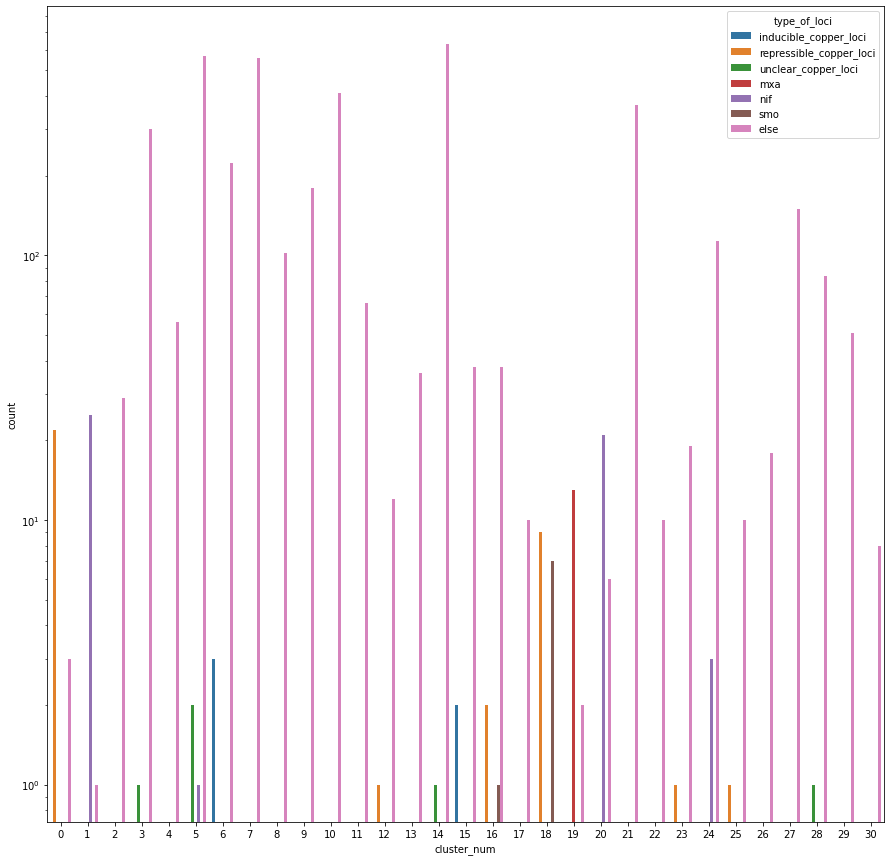

In [29]:
plt.figure(figsize=[15, 15])

g = sns.barplot(
    data = df_melt_counts_all_loci, 
    x = "cluster_num", 
    y = "gene_count", 
    hue = "type_of_loci"
    )

g.set_yscale("log")
g.set_ylabel("count")





# Pipeline


## Functions

### Gene Composition of Clusters of Interest

In [30]:
possible_types = list(df_formatted_clusters.columns)
possible_types

[0,
 'all_loci',
 'inducible_copper_loci',
 'repressible_copper_loci',
 'unclear_copper_loci',
 'cu_repressible',
 'mxa',
 'nif',
 'smo',
 'else']

In [31]:
# Given information about the cluster selection, number, and loci type of interest, returns comprising genes
def cluster_exploration_of_genes(clustering_selection, cluster_number, all_or_type):
    
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        clusters_of_interest = cluster_compositions[clustering_selection][1]

        chosen_clusters = []

        if all_or_type == "all": 
            chosen_clusters = list(clusters_of_interest[(clusters_of_interest["cluster_num"] == cluster_number)]["genes"])

            # Obtained from another column on this dataframe
            column_names = clusters_of_interest[(clusters_of_interest["cluster_num"] == cluster_number)]["type_of_loci"]

        elif all_or_type in possible_types:
            chosen_clusters = list(clusters_of_interest[(clusters_of_interest["cluster_num"] == cluster_number) & (clusters_of_interest["type_of_loci"] == all_or_type)]["genes"])

            # Simply the type itself
            column_names = [all_or_type]

        df_chosen_clusters = pd.DataFrame(chosen_clusters).T
        df_chosen_clusters.columns = column_names

        return df_chosen_clusters

In [32]:
# Modified Set of Ideal Labels fo solely those of interest: 
df_mod_ideal_labels = df_ideal_labels.labels.copy()
df_mod_ideal_labels = df_mod_ideal_labels[0:9]
df_mod_ideal_labels

0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [7, 7, 7, 7, 7, 1, 7, 1, 1, 1, 1, 8, 7, 8, 7, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
4    [12, 4, 17, 4, 4, 1, 12, 7, 7, 7, 7, 12, 17, 9...
5    [18, 18, 17, 18, 18, 0, 5, 0, 0, 0, 0, 5, 3, 1...
6    [0, 6, 0, 6, 6, 14, 6, 14, 14, 14, 14, 6, 12, ...
7    [14, 14, 3, 14, 21, 5, 5, 21, 21, 21, 21, 5, 7...
8    [25, 9, 20, 26, 9, 19, 18, 19, 19, 21, 21, 22,...
Name: labels, dtype: object

### Plotting Clusters of Interest

In [49]:
# Note: requires df_ideal_labels to contain all labels + metadata for 
#       clusterings reflected in the order of the "sets of labels"
def plot_genes_in_clusters(set_of_labels):
    
    cluster_compositions = []
    
    for num, list_labels in enumerate(set_of_labels): 

        method = df_ideal_labels.iloc[num]["method"]
        param1 = df_ideal_labels.iloc[num]["param1"]
        param2 = df_ideal_labels.iloc[num]["param2"]
        param3 = df_ideal_labels.iloc[num]["param3"]

        title = str(method) + ", param1 = " + str(param1) + ", param2 = " +str(param2)  + ", param3 = " + str(param3) 


        method_label = pd.Series(df_ideal_labels.labels[num], index = labels_ordered)
        df_method_label = pd.DataFrame(method_label)
        df_method_label.columns = ['cluster_num']
        df_method_label = df_method_label.sort_values('cluster_num')
        df_method_label = df_method_label.reset_index()

        method_cluster_composition = pd.Series(df_method_label.groupby("cluster_num")["locus_tag"].apply(list).to_dict())

        #buckets_all = {"inducible": [], "repressible": [], "unclear": [], "cu_repressible": [], "mxa": [], "nif": [], "smo": []}
        #counts_buckets_all = {"inducible": [], "repressible": [], "unclear": [], "cu_repressible": [], "mxa": [], "nif": [], "smo": []}
        buckets_all = {"inducible": [], "repressible": [], "unclear": [], "mxa": [], "nif": [], "smo": []}
        counts_buckets_all = {"inducible": [], "repressible": [], "unclear": [], "mxa": [], "nif": [], "smo": []}


        adjusted_granular_all_genes = granular_all_genes.copy()
        adjusted_granular_all_genes.pop('cu_repressible')
        types = (list(adjusted_granular_all_genes.keys()))

        bucket_all_labeled = []
        bucket_all_else = method_cluster_composition.copy()
        counts_bucket_all_else = method_cluster_composition.copy()

        for type_of_gene in types:
            for num, cluster in enumerate(method_cluster_composition): 
                buckets_all[type_of_gene].append(list(set(granular_all_genes[type_of_gene]) & set(cluster)))
                counts_buckets_all[type_of_gene].append(len(list(set(granular_all_genes[type_of_gene]) & set(cluster))))

        for num, cluster in enumerate(method_cluster_composition): 
            for type_of_gene in types:
                if type_of_gene == types[0]:
                    merged_loci = set(buckets_all[type_of_gene][num])
                    bucket_all_labeled.append(merged_loci)
                else: 
                    merged_loci = set(buckets_all[type_of_gene][num]) | set(bucket_all_labeled[num])
                    bucket_all_labeled[num] = (merged_loci)

        for num, cluster in enumerate(method_cluster_composition): 
            bucket_all_else[num] = list(set(bucket_all_else[num]) - bucket_all_labeled[num])
            counts_bucket_all_else[num] = len(bucket_all_else[num])

        df_all_clusters = pd.DataFrame(buckets_all)
        df_count_all_clusters = pd.DataFrame(counts_buckets_all)

        df_formatted_clusters = pd.DataFrame(np.arange(0, len(bucket_all_else)))
        df_formatted_clusters.columns = ["cluster_num"]
        #df_formatted_clusters["all_loci"] = method_cluster_composition
        df_formatted_clusters["inducible_copper_loci"] = df_all_clusters["inducible"]
        df_formatted_clusters["repressible_copper_loci"] = df_all_clusters["repressible"]
        df_formatted_clusters["unclear_copper_loci"] = df_all_clusters["unclear"]
        #df_formatted_clusters["cu_repressible"] = df_all_clusters["cu_repressible"]
        df_formatted_clusters["mxa"] = df_all_clusters["mxa"]
        df_formatted_clusters["nif"] = df_all_clusters["nif"]
        df_formatted_clusters["smo"] = df_all_clusters["smo"]
        df_formatted_clusters["else"] = bucket_all_else


        df_count_formatted_clusters = pd.DataFrame(np.arange(0, len(counts_bucket_all_else)))

        df_count_formatted_clusters.columns = ["cluster_num"]
        df_count_formatted_clusters["inducible_copper_loci"] = df_count_all_clusters["inducible"]
        df_count_formatted_clusters["repressible_copper_loci"] = df_count_all_clusters["repressible"]
        df_count_formatted_clusters["unclear_copper_loci"] = df_count_all_clusters["unclear"]
        #df_count_formatted_clusters["cu_repressible"] = df_count_all_clusters["cu_repressible"]
        df_count_formatted_clusters["mxa"] = df_count_all_clusters["mxa"]
        df_count_formatted_clusters["nif"] = df_count_all_clusters["nif"]
        df_count_formatted_clusters["smo"] = df_count_all_clusters["smo"]
        df_count_formatted_clusters["else"] = counts_bucket_all_else

        # removing cu_repressible to avoid repetition
        #df_melt_all_loci = df_formatted_clusters.melt(id_vars="cluster_num", value_vars=["inducible_copper_loci", "repressible_copper_loci", "unclear_copper_loci", "cu_repressible", "mxa", "nif", "smo", "else"])
        df_melt_all_loci = df_formatted_clusters.melt(id_vars="cluster_num", value_vars=["inducible_copper_loci", "repressible_copper_loci", "unclear_copper_loci", "mxa", "nif", "smo", "else"])
        df_melt_all_loci.columns = ["cluster_num", "type_of_loci", "genes"]

        # removing cu_repressible to avoid repetition
        #df_melt_counts_all_loci = df_count_formatted_clusters.melt(id_vars="cluster_num", value_vars=["inducible_copper_loci", "repressible_copper_loci", "unclear_copper_loci", "cu_repressible", "mxa", "nif", "smo", "else"])
        df_melt_counts_all_loci = df_count_formatted_clusters.melt(id_vars="cluster_num", value_vars=["inducible_copper_loci", "repressible_copper_loci", "unclear_copper_loci", "mxa", "nif", "smo", "else"])
        df_melt_counts_all_loci.columns = ["cluster_num", "type_of_loci", "gene_count"]

        df_melt_all_loci["gene_counts"] = df_melt_counts_all_loci["gene_count"]
        

        g = alt.Chart(df_melt_all_loci).mark_bar().encode(
        x=alt.X('cluster_num:N'),
        y=alt.Y('gene_counts:Q', title='count of genes'), #, scale = alt.Scale(type = "symlog")),
        color='type_of_loci',
        tooltip=['type_of_loci', 'gene_counts', 'genes']
        ).configure_view(
        stroke='transparent'
        ).interactive()

        g.title = title
        g.display()

        save_location = '/work/skvdev17/workspace/5G-rnaseq-sandbox/plots/adjusted_all_genes_verification/' + title.replace(" ", "_") + ".html"
        g.save(save_location, embed_options={'renderer':'svg'})
        
        cluster_compositions.append([title, df_melt_all_loci])
    
    return cluster_compositions

## Cluster Composition Visualization

In [50]:
cluster_compositions = plot_genes_in_clusters(df_mod_ideal_labels)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

## Analysis of Clusters

<b>ordering of optimal clusters:</b>

0. Agglomerative
1. Agglomerative
2. Agglomerative
3. Agglomerative
4. KMeans - low # of clusters
5. KMeans - high # of clusters
6. Birch - low # of clusters
7. Birch -  high # of clusters
8. KMedoids 

### Genes Composing Clusters

In [35]:
from IPython.display import display

In [51]:
clustering_selection = 7
cluster_number = 24
all_or_type = "nif"
# possible loci_types = 'inducible_copper_loci', 'repressible_copper_loci', 'unclear_copper_loci', 'mxa', 'nif', 'smo'"

df_genes_in_cluster = cluster_exploration_of_genes(clustering_selection, cluster_number, all_or_type)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_genes_in_cluster)

if all_or_type in list(possible_types):
    list_of_genes = df_genes_in_cluster[all_or_type]
    


,nif
0,EQU24_RS17310
1,EQU24_RS17305
2,EQU24_RS17105


### Meta Data Info

In [52]:
gene_loci = ["EQU24_RS01835"]
gene_list = list(list_of_genes)

x = get_metadata(gene_list)


,group,locus_id,gene,product,notes,Unnamed: 5
6,nif,EQU24_RS17310,,hypothetical protein,,
7,nif,EQU24_RS17305,,4Fe-4S dicluster domain-containing protein,,
41,nif,EQU24_RS17105,cls,cardiolipin synthase,,


# Data Exportation

In [61]:
for cluster_num, clustering in enumerate(cluster_compositions):
    
    cluster_desc = clustering[0]
    df_cluster = clustering[1]
    
    file_name = 
    
    df_cluster.to_csv(cluster_desc)

,cluster_num,type_of_loci,genes,gene_counts
0,0,inducible_copper_loci,[],0
1,1,inducible_copper_loci,"[EQU24_RS19315, EQU24_RS19310, EQU24_RS19305]",3
2,2,inducible_copper_loci,[],0
3,3,inducible_copper_loci,[],0
4,4,inducible_copper_loci,[],0
...,...,...,...,...
128,14,else,"[EQU24_RS00160, EQU24_RS16415, EQU24_RS19970, ...",19
129,15,else,"[EQU24_RS14125, EQU24_RS14130]",2
130,16,else,"[EQU24_RS17415, EQU24_RS17060, EQU24_RS17410]",3
131,17,else,"[EQU24_RS20610, EQU24_RS18860, EQU24_RS12815]",3


# Scratch Work

In [38]:
gene_list

NameError: name 'gene_list' is not defined

In [39]:
granular_all_genes.keys()

dict_keys(['inducible', 'repressible', 'unclear', 'cu_repressible', 'mxa', 'nif', 'smo'])

In [216]:
copper_cluster_loci = pd.Series(df_all_copper_clusters.groupby("variable")["value"].apply(list).to_dict())
copper_cluster_loci

KeyError: 'variable'

In [473]:
for num, list_labels in enumerate(df_ideal_labels.labels): 
    
    method = df_ideal_labels.iloc[num]["method"]
    param1 = df_ideal_labels.iloc[num]["param1"]
    param2 = df_ideal_labels.iloc[num]["param2"]
    param3 = df_ideal_labels.iloc[num]["param3"]
    
    title = str(method) + ", param1 = " + str(param1) + ", param2 = " +str(param2)  + ", param3 = " + str(param3) 
    
    
    method_label = pd.Series(df_ideal_labels.labels[num], index = labels_ordered)
    df_method_label = pd.DataFrame(method_label)
    df_method_label.columns = ['cluster_num']
    df_method_label = df_method_label.sort_values('cluster_num')
    df_method_label = df_method_label.reset_index()
    
    method_cluster_composition = pd.Series(df_method_label.groupby("cluster_num")["locus_tag"].apply(list).to_dict())
    
    buckets_copper = []
    counts_buckets_copper = []

    for num, cluster in enumerate(method_cluster_composition): 
        buckets_copper.append([num, cluster, list(set(copper_genes) & set(cluster))])
        counts_buckets_copper.append([num, len(cluster), len(list(set(copper_genes) & set(cluster)))])

    df_buckets_copper = pd.DataFrame(buckets_copper)
    df_buckets_copper.columns = ["cluster_num", "all_loci", "copper_loci"]

    df_counts_buckets_copper = pd.DataFrame(counts_buckets_copper)
    df_counts_buckets_copper.columns = ["cluster_num", "all_loci", "copper_loci"]
    
        
    df_melt_buckets_copper = df_buckets_copper.melt(id_vars = "cluster_num", value_vars = ["all_loci", "copper_loci"])
    df_melt_buckets_copper.columns = ["cluster_num", "type_of_loci", "genes"]
    
    df_melt_counts_buckets_copper = df_counts_buckets_copper.melt(id_vars = "cluster_num", value_vars = ["all_loci", "copper_loci"])
    df_melt_counts_buckets_copper.columns = ["cluster_num", "type_of_loci", "gene_count"]
    
    
    
    
    df_melt_buckets_copper["gene_counts"] = df_melt_counts_buckets_copper["gene_count"]



    g = alt.Chart(df_melt_buckets_copper).mark_bar().encode(
    x=alt.X('cluster_num:N'),
    y=alt.Y('gene_counts:Q', title='count of genes'), #, scale = alt.Scale(type = "symlog")),
    color='type_of_loci',
    tooltip=['genes', 'gene_counts']
    ).configure_view(
    stroke='transparent'
    ).interactive()
    
    g.title = title
    g.display()
    
    save_location = 'plots/copper_cluster_verification/' + title.replace(" ", "_") + ".html"
    g.save(save_location, embed_options={'renderer':'svg'})

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [ ]:
adjusted_granular_all_genes

In [ ]:
df_melt_buckets_copper = df_buckets_copper.melt(id_vars = "cluster_num", value_vars = ["all_loci", "copper_loci"])
df_melt_buckets_copper.columns = ["cluster_num", "type_of_loci", "gene_count"]

df_melt_buckets_copper

In [ ]:
df_melt_counts_buckets_copper["gene_count"]

In [ ]:
df_melt_buckets_copper["gene_counts"] = df_melt_counts_buckets_copper["gene_count"]

df_melt_buckets_copper

In [217]:
types

for type_of_copper_gene in types: 
    print(type_of_copper_gene)
    # cluster = kmedoids_cluster_composition[32]
    # list(set(granular_copper_genes[types[2]]) & set(cluster))

    for num, cluster in enumerate(kmedoids_cluster_composition): 
        buckets_copper[type_of_copper_gene].append([num, list(set(granular_copper_genes[type_of_copper_gene]) & set(cluster))])
        print(list(set(granular_copper_genes[type_of_copper_gene]) & set(cluster)))

buckets_copper

inducible
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
repressible
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
unclear
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
cu_repressible


KeyError: 'cu_repressible'

In [218]:
df_buckets_copper = pd.DataFrame(buckets_copper)
df_buckets_copper.columns = ["cluster_num", "all_loci", "copper_loci"]

df_counts_buckets_copper = pd.DataFrame(counts_buckets_copper)
df_counts_buckets_copper.columns = ["cluster_num", "all_loci", "copper_loci"]

df_buckets_copper

,cluster_num,all_loci,copper_loci
0,[],[],[]
1,[],[],[]
2,[],[],[]
3,[],[],[]
4,[],[],[]
...,...,...,...
67,"[31, []]","[31, []]","[31, []]"
68,"[32, []]","[32, []]","[32, []]"
69,"[33, []]","[33, []]","[33, []]"
70,"[34, []]","[34, []]","[34, []]"


In [219]:
df_melt_counts_buckets_copper = df_counts_buckets_copper.melt(id_vars = "cluster_num", value_vars = ["all_loci", "copper_loci"])
df_melt_counts_buckets_copper.columns = ["cluster_num", "type_of_loci", "gene_count"]

df_melt_counts_buckets_copper

,cluster_num,type_of_loci,gene_count
0,"[0, 122, 0]",all_loci,"[0, 122, 0]"
1,"[1, 135, 0]",all_loci,"[1, 135, 0]"
2,"[2, 34, 0]",all_loci,"[2, 34, 0]"
3,"[3, 84, 0]",all_loci,"[3, 84, 0]"
4,"[4, 37, 0]",all_loci,"[4, 37, 0]"
...,...,...,...
67,"[31, 68, 0]",copper_loci,"[31, 68, 0]"
68,"[32, 44, 0]",copper_loci,"[32, 44, 0]"
69,"[33, 43, 0]",copper_loci,"[33, 43, 0]"
70,"[34, 211, 1]",copper_loci,"[34, 211, 0]"
